In [ ]:
!pip install google-cloud-storage
!pip install pandas

In [1]:
from google.cloud import storage
import pandas as pd

bucket_name = "nobu_w266_final_project"

storage_client = storage.Client()
bucket = storage_client.get_bucket(bucket_name)

# When you have your files in a subfolder of the bucket.
my_prefix = "OECD_file/" # the name of the subfolder
blobs = bucket.list_blobs(prefix = my_prefix, delimiter = '/')

for blob in blobs:
    if(blob.name != my_prefix): # ignoring the subfolder itself 
        file_name = blob.name.replace(my_prefix, "")
        blob.download_to_filename(file_name) # download the file to the machine
        df = pd.read_csv(file_name, delimiter="|") # load the data
        print(df)

          appln_id        app_nbr  filing  tech_field  many_field  \
0         16427085  EP19780100001    1978        16.0           1   
1         16427086  EP19780100002    1978        31.0           0   
2         16427087  EP19780100003    1978        32.0           1   
3         16427088  EP19780100004    1978        14.0           1   
4         16427089  EP19780100005    1978         8.0           0   
...            ...            ...     ...         ...         ...   
3507894  506385435  EP20190405001    2019         8.0           1   
3507895  506385437  EP20190405002    2019        24.0           0   
3507896  507537560  EP20190460001    2019        35.0           0   
3507897  505638106  EP20190461501    2019         1.0           1   
3507898  506424754  EP20190700348    2019         6.0           0   

         patent_scope  family_size  grant_lag  bwd_cits  npl_cits  ...  \
0                   3            7     1203.0         4         0  ...   
1                   1  

In [2]:
df

,appln_id,app_nbr,filing,tech_field,many_field,patent_scope,family_size,grant_lag,bwd_cits,npl_cits,...,fwd_cits7,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6
0,16427085,EP19780100001,1978,16.0,1,3,7,1203.0,4,0,...,4,0,NaN,NaN,0.705247,0.793388,0.090909,13.0,0.383706,0.406093
1,16427086,EP19780100002,1978,31.0,0,1,3,783.0,3,0,...,1,0,NaN,NaN,0.000000,0.500000,0.000000,6.0,0.144831,0.230807
2,16427087,EP19780100003,1978,32.0,1,2,1,NaN,7,0,...,1,0,NaN,NaN,NaN,0.704082,0.428571,2.0,NaN,NaN
3,16427088,EP19780100004,1978,14.0,1,4,8,783.0,1,1,...,1,0,NaN,NaN,0.693878,0.666667,0.000000,6.0,0.260275,0.299739
4,16427089,EP19780100005,1978,8.0,0,1,4,699.0,4,0,...,1,0,NaN,NaN,0.000000,0.459834,0.000000,6.0,0.145969,0.271464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507894,506385435,EP20190405001,2019,8.0,1,2,2,NaN,6,0,...,0,0,NaN,NaN,NaN,0.520816,0.000000,NaN,NaN,NaN
3507895,506385437,EP20190405002,2019,24.0,0,1,2,NaN,3,5,...,0,0,NaN,NaN,NaN,0.375000,0.250000,NaN,NaN,NaN
3507896,507537560,EP20190460001,2019,35.0,0,1,1,NaN,5,0,...,0,0,NaN,NaN,NaN,0.099723,0.052632,NaN,NaN,NaN
3507897,505638106,EP20190461501,2019,1.0,1,2,2,NaN,12,0,...,0,0,NaN,NaN,NaN,0.851562,0.343750,NaN,NaN,NaN


In [22]:
# Now try to pull the patent data combining 2 files to accumulate 10 years
from google.cloud import storage
import pandas as pd

bucket_name = "nobu_w266_final_project"

storage_client = storage.Client()
bucket = storage_client.get_bucket(bucket_name)

# When you have your files in a subfolder of the bucket.
my_prefix = "Patent_EP_2/" # the name of the subfolder
blobs = bucket.list_blobs(prefix = my_prefix, delimiter = '/')

patent_data_combine = None

for blob in blobs:
    if(blob.name != my_prefix): # ignoring the subfolder itself 
        file_name = blob.name.replace(my_prefix, "")
        blob.download_to_filename(file_name) # download the file to the machine
        patent_data = pd.read_csv(file_name) # load the data
        # print(patent_data)
        if patent_data_combine is None:
            patent_data_combine = patent_data
        else:
            patent_data_combine = patent_data_combine.append(patent_data)

In [23]:
patent_data_combine.head()

,application_number,application_number_formatted,title_text,abstract_text
0,EP-10702173-A,EP20100702173,System and method for automatic capture and ar...,"Medical vital signs (110) are captured, record..."
1,EP-10786770-A,EP20100786770,Control rod drive mechanism for nuclear reactor,A control rod drive mechanism (CRDM) for use i...
2,EP-10839276-A,EP20100839276,Force sensor and method of manufacturing the same,Provided are a force sensor and a method of ma...
3,EP-10853253-A,EP20100853253,Rail-guided cart system and branching control ...,A rail guided vehicle provided with a lateral ...
4,EP-10856221-A,EP20100856221,Gas sensor housing,The present invention relates to gas sensor ho...


### drop duplicated rows

In [24]:
patent_data_combine.drop_duplicates(subset='application_number_formatted', keep = 'first', inplace = True)
patent_data_combine

,application_number,application_number_formatted,title_text,abstract_text
0,EP-10702173-A,EP20100702173,System and method for automatic capture and ar...,"Medical vital signs (110) are captured, record..."
1,EP-10786770-A,EP20100786770,Control rod drive mechanism for nuclear reactor,A control rod drive mechanism (CRDM) for use i...
2,EP-10839276-A,EP20100839276,Force sensor and method of manufacturing the same,Provided are a force sensor and a method of ma...
3,EP-10853253-A,EP20100853253,Rail-guided cart system and branching control ...,A rail guided vehicle provided with a lateral ...
4,EP-10856221-A,EP20100856221,Gas sensor housing,The present invention relates to gas sensor ho...
...,...,...,...,...
168751,EP-15173836-A,EP20150173836,Process for preparing vanillin,The present invention relates to a process for...
168752,EP-15172469-A,EP20150172469,Operating element for a domestic appliance and...,The invention relates to an operating element ...
168753,EP-15170012-A,EP20150170012,Bacterial capsular polysaccharide yield enhanc...,The instant invention provides significant imp...
168754,EP-15201788-A,EP20150201788,"4-hydroxy-2-phenyl-1,3-thiazol-5-yl methanone ...",The invention relates to compounds acting as a...


### merge two daraframes

In [25]:
df_merge = pd.merge(patent_data_combine, df, left_on='application_number_formatted', right_on='app_nbr', how='inner')

In [26]:
df_merge

,application_number,application_number_formatted,title_text,abstract_text,appln_id,app_nbr,filing,tech_field,many_field,patent_scope,...,fwd_cits7,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6
0,EP-10702173-A,EP20100702173,System and method for automatic capture and ar...,"Medical vital signs (110) are captured, record...",274655310,EP20100702173,2010,13.0,1,2,...,0,0,NaN,NaN,NaN,0.448980,0.285714,3.0,NaN,NaN
1,EP-10786770-A,EP20100786770,Control rod drive mechanism for nuclear reactor,A control rod drive mechanism (CRDM) for use i...,329672115,EP20100786770,2010,27.0,0,1,...,1,0,NaN,NaN,0.53125,0.763377,0.172414,8.0,0.517830,0.461314
2,EP-10839276-A,EP20100839276,Force sensor and method of manufacturing the same,Provided are a force sensor and a method of ma...,335185479,EP20100839276,2010,10.0,0,1,...,0,0,NaN,NaN,NaN,0.812500,0.406250,9.0,0.226496,0.262264
3,EP-10853253-A,EP20100853253,Rail-guided cart system and branching control ...,A rail guided vehicle provided with a lateral ...,340185037,EP20100853253,2010,32.0,1,2,...,0,0,NaN,NaN,NaN,0.524444,0.133333,8.0,0.239130,0.242765
4,EP-10856221-A,EP20100856221,Gas sensor housing,The present invention relates to gas sensor ho...,341784480,EP20100856221,2010,10.0,0,2,...,0,0,NaN,NaN,NaN,0.824490,0.314286,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843923,EP-15165512-A,EP20150165512,Two-step method for the production of a polyur...,Disclosed is a two-step process for making a p...,439667405,EP20150165512,2015,17.0,1,2,...,2,0,NaN,NaN,0.50000,0.567273,0.200000,2.0,NaN,NaN
843924,EP-15173836-A,EP20150173836,Process for preparing vanillin,The present invention relates to a process for...,441768403,EP20150173836,2015,14.0,0,1,...,0,0,NaN,NaN,NaN,0.795841,0.282609,2.0,NaN,NaN
843925,EP-15172469-A,EP20150172469,Operating element for a domestic appliance and...,The invention relates to an operating element ...,441417485,EP20150172469,2015,30.0,1,3,...,0,0,NaN,NaN,NaN,0.916800,0.680000,NaN,NaN,NaN
843926,EP-15170012-A,EP20150170012,Bacterial capsular polysaccharide yield enhanc...,The instant invention provides significant imp...,440702884,EP20150170012,2015,15.0,0,1,...,0,0,NaN,NaN,NaN,0.801038,0.705882,NaN,NaN,NaN


### keep only quality_index_4 >= 0

In [27]:
df_merge_quality = df_merge[(df_merge['quality_index_4'] >=0) & (len(df_merge['title_text']) >0) & (len(df_merge['abstract_text']) >0)]

In [28]:
df_merge_quality

,application_number,application_number_formatted,title_text,abstract_text,appln_id,app_nbr,filing,tech_field,many_field,patent_scope,...,fwd_cits7,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6
1,EP-10786770-A,EP20100786770,Control rod drive mechanism for nuclear reactor,A control rod drive mechanism (CRDM) for use i...,329672115,EP20100786770,2010,27.0,0,1,...,1,0,NaN,NaN,0.531250,0.763377,0.172414,8.0,0.517830,0.461314
2,EP-10839276-A,EP20100839276,Force sensor and method of manufacturing the same,Provided are a force sensor and a method of ma...,335185479,EP20100839276,2010,10.0,0,1,...,0,0,NaN,NaN,NaN,0.812500,0.406250,9.0,0.226496,0.262264
3,EP-10853253-A,EP20100853253,Rail-guided cart system and branching control ...,A rail guided vehicle provided with a lateral ...,340185037,EP20100853253,2010,32.0,1,2,...,0,0,NaN,NaN,NaN,0.524444,0.133333,8.0,0.239130,0.242765
6,EP-10157182-A,EP20100157182,Electric iron with a synchronizing temperature...,An electric iron (1) includes a control panel ...,275358782,EP20100157182,2010,34.0,0,1,...,0,0,NaN,NaN,NaN,0.370370,0.222222,5.0,0.190909,0.306011
7,EP-10784612-A,EP20100784612,Method and system for concurrent background an...,A method and system for permitting host write ...,329542667,EP20100784612,2010,6.0,0,1,...,2,2,NaN,NaN,0.000000,0.855556,0.533333,8.0,0.290995,0.353795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843908,EP-15159161-A,EP20150159161,Freeze dryer having a viewing window,"The invention relates to a freeze dryer (1), w...",438010746,EP20150159161,2015,23.0,0,1,...,1,0,NaN,NaN,0.000000,0.728889,0.200000,4.0,0.346264,0.308932
843909,EP-15177561-A,EP20150177561,Sealing arrangement,A sealing device comprising a sealing ring (31...,442540869,EP20150177561,2015,31.0,0,1,...,0,0,NaN,NaN,NaN,0.561983,0.363636,4.0,0.185606,0.222027
843917,EP-15176244-A,EP20150176244,Organic light-emitting diode display device an...,An organic light-emitting diode (OLED) display...,442288654,EP20150176244,2015,8.0,0,1,...,3,3,NaN,NaN,0.152778,0.848889,0.266667,3.0,0.414980,0.381676
843918,EP-15166202-A,EP20150166202,Ultrasound diagnosis apparatus and method of o...,Disclosed are an ultrasound diagnosis apparatu...,439724878,EP20150166202,2015,13.0,0,1,...,0,0,NaN,NaN,NaN,0.677686,0.363636,4.0,0.249763,0.199128


In [29]:
max(df_merge_quality['quality_index_4'])

0.959039115646259

In [30]:
min(df_merge_quality['quality_index_4'])

0.0268031189083821

In [31]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

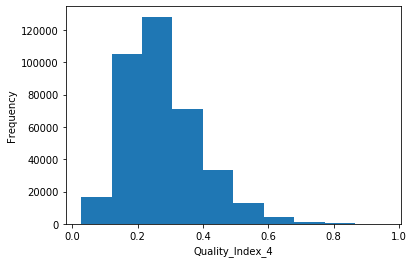

In [32]:
plt.hist(df_merge_quality['quality_index_4'], density=False)  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('Quality_Index_4');

In [33]:
conditions = [

    (df_merge_quality['quality_index_4'] < 0.3),
    (df_merge_quality['quality_index_4'] >= 0.3)
]

choices = ['0', '1']

In [35]:
import numpy as np
df_merge_quality['quality_rank'] = np.select(condlist=conditions, choicelist=choices)

/home/nobu_yamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
df_merge_quality

,application_number,application_number_formatted,title_text,abstract_text,appln_id,app_nbr,filing,tech_field,many_field,patent_scope,...,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,quality_rank
1,EP-10786770-A,EP20100786770,Control rod drive mechanism for nuclear reactor,A control rod drive mechanism (CRDM) for use i...,329672115,EP20100786770,2010,27.0,0,1,...,0,NaN,NaN,0.531250,0.763377,0.172414,8.0,0.517830,0.461314,1
2,EP-10839276-A,EP20100839276,Force sensor and method of manufacturing the same,Provided are a force sensor and a method of ma...,335185479,EP20100839276,2010,10.0,0,1,...,0,NaN,NaN,NaN,0.812500,0.406250,9.0,0.226496,0.262264,0
3,EP-10853253-A,EP20100853253,Rail-guided cart system and branching control ...,A rail guided vehicle provided with a lateral ...,340185037,EP20100853253,2010,32.0,1,2,...,0,NaN,NaN,NaN,0.524444,0.133333,8.0,0.239130,0.242765,0
6,EP-10157182-A,EP20100157182,Electric iron with a synchronizing temperature...,An electric iron (1) includes a control panel ...,275358782,EP20100157182,2010,34.0,0,1,...,0,NaN,NaN,NaN,0.370370,0.222222,5.0,0.190909,0.306011,0
7,EP-10784612-A,EP20100784612,Method and system for concurrent background an...,A method and system for permitting host write ...,329542667,EP20100784612,2010,6.0,0,1,...,2,NaN,NaN,0.000000,0.855556,0.533333,8.0,0.290995,0.353795,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843908,EP-15159161-A,EP20150159161,Freeze dryer having a viewing window,"The invention relates to a freeze dryer (1), w...",438010746,EP20150159161,2015,23.0,0,1,...,0,NaN,NaN,0.000000,0.728889,0.200000,4.0,0.346264,0.308932,1
843909,EP-15177561-A,EP20150177561,Sealing arrangement,A sealing device comprising a sealing ring (31...,442540869,EP20150177561,2015,31.0,0,1,...,0,NaN,NaN,NaN,0.561983,0.363636,4.0,0.185606,0.222027,0
843917,EP-15176244-A,EP20150176244,Organic light-emitting diode display device an...,An organic light-emitting diode (OLED) display...,442288654,EP20150176244,2015,8.0,0,1,...,3,NaN,NaN,0.152778,0.848889,0.266667,3.0,0.414980,0.381676,1
843918,EP-15166202-A,EP20150166202,Ultrasound diagnosis apparatus and method of o...,Disclosed are an ultrasound diagnosis apparatu...,439724878,EP20150166202,2015,13.0,0,1,...,0,NaN,NaN,NaN,0.677686,0.363636,4.0,0.249763,0.199128,0


In [37]:
df_merge_quality.quality_rank.value_counts()

0    242663
1    130063
Name: quality_rank, dtype: int64

In [38]:
242663/(242663+130063)

0.6510492962658897

In [39]:
df_merge_quality['text'] = df_merge_quality['title_text'] + '. ' + df_merge_quality['abstract_text']

/home/nobu_yamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_merge_quality

,application_number,application_number_formatted,title_text,abstract_text,appln_id,app_nbr,filing,tech_field,many_field,patent_scope,...,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,quality_rank,text
1,EP-10786770-A,EP20100786770,Control rod drive mechanism for nuclear reactor,A control rod drive mechanism (CRDM) for use i...,329672115,EP20100786770,2010,27.0,0,1,...,NaN,NaN,0.531250,0.763377,0.172414,8.0,0.517830,0.461314,1,Control rod drive mechanism for nuclear reacto...
2,EP-10839276-A,EP20100839276,Force sensor and method of manufacturing the same,Provided are a force sensor and a method of ma...,335185479,EP20100839276,2010,10.0,0,1,...,NaN,NaN,NaN,0.812500,0.406250,9.0,0.226496,0.262264,0,Force sensor and method of manufacturing the s...
3,EP-10853253-A,EP20100853253,Rail-guided cart system and branching control ...,A rail guided vehicle provided with a lateral ...,340185037,EP20100853253,2010,32.0,1,2,...,NaN,NaN,NaN,0.524444,0.133333,8.0,0.239130,0.242765,0,Rail-guided cart system and branching control ...
6,EP-10157182-A,EP20100157182,Electric iron with a synchronizing temperature...,An electric iron (1) includes a control panel ...,275358782,EP20100157182,2010,34.0,0,1,...,NaN,NaN,NaN,0.370370,0.222222,5.0,0.190909,0.306011,0,Electric iron with a synchronizing temperature...
7,EP-10784612-A,EP20100784612,Method and system for concurrent background an...,A method and system for permitting host write ...,329542667,EP20100784612,2010,6.0,0,1,...,NaN,NaN,0.000000,0.855556,0.533333,8.0,0.290995,0.353795,0,Method and system for concurrent background an...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843908,EP-15159161-A,EP20150159161,Freeze dryer having a viewing window,"The invention relates to a freeze dryer (1), w...",438010746,EP20150159161,2015,23.0,0,1,...,NaN,NaN,0.000000,0.728889,0.200000,4.0,0.346264,0.308932,1,Freeze dryer having a viewing window. The inve...
843909,EP-15177561-A,EP20150177561,Sealing arrangement,A sealing device comprising a sealing ring (31...,442540869,EP20150177561,2015,31.0,0,1,...,NaN,NaN,NaN,0.561983,0.363636,4.0,0.185606,0.222027,0,Sealing arrangement. A sealing device comprisi...
843917,EP-15176244-A,EP20150176244,Organic light-emitting diode display device an...,An organic light-emitting diode (OLED) display...,442288654,EP20150176244,2015,8.0,0,1,...,NaN,NaN,0.152778,0.848889,0.266667,3.0,0.414980,0.381676,1,Organic light-emitting diode display device an...
843918,EP-15166202-A,EP20150166202,Ultrasound diagnosis apparatus and method of o...,Disclosed are an ultrasound diagnosis apparatu...,439724878,EP20150166202,2015,13.0,0,1,...,NaN,NaN,NaN,0.677686,0.363636,4.0,0.249763,0.199128,0,Ultrasound diagnosis apparatus and method of o...


In [43]:
data_train = df_merge_quality.sample(frac=1)[:5000]
data_train

,application_number,application_number_formatted,title_text,abstract_text,appln_id,app_nbr,filing,tech_field,many_field,patent_scope,...,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,quality_rank,text
647431,EP-14790155-A,EP20140790155,Hydrocarbon polymers with two alkoxysilane end...,An alkoxysilane-terminated hydrocarbon polymer...,423448940,EP20140790155,2014,17.0,0,1,...,NaN,NaN,NaN,0.921811,0.740741,4.0,0.328042,0.262575,1,Hydrocarbon polymers with two alkoxysilane end...
471213,EP-13811824-A,EP20130811824,Steam strainer,The invention relates to a steam strainer and ...,413914125,EP20130811824,2013,24.0,1,2,...,NaN,NaN,0.666667,0.888889,0.444444,6.0,0.374956,0.392180,1,Steam strainer. The invention relates to a ste...
621962,EP-14781587-A,EP20140781587,"Arrangement for a household appliance, imbalan...",The invention relates to an arrangement (16) f...,422757249,EP20140781587,2014,34.0,0,1,...,NaN,NaN,NaN,0.512397,0.000000,4.0,0.194444,0.241883,0,"Arrangement for a household appliance, imbalan..."
322762,EP-12709965-A,EP20120709965,Heteroaryl derivatives as alpha7 nachr modulators,"Disclosed is a compound of formula (I), wherei...",352632843,EP20120709965,2012,16.0,1,3,...,NaN,NaN,NaN,0.913977,0.112628,5.0,0.472222,0.416983,1,Heteroaryl derivatives as alpha7 nachr modulat...
94975,EP-10275086-A,EP20100275086,Level measurement apparatus,The invention provides a detector assembly for...,320406676,EP20100275086,2010,10.0,1,2,...,NaN,NaN,NaN,0.812500,0.312500,8.0,0.239316,0.209032,0,Level measurement apparatus. The invention pro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393460,EP-12831363-A,EP20120831363,Side-loading ratchet device,A ratchet device 1 for a strap has a body 105 ...,404982516,EP20120831363,2012,26.0,1,2,...,NaN,NaN,NaN,0.693878,0.714286,6.0,0.560606,0.452423,1,Side-loading ratchet device. A ratchet device ...
49176,EP-10193868-A,EP20100193868,Method for full-bandwidth source deghosting of...,Seismic data recorded in a marine streamer are...,329345737,EP20100193868,2010,10.0,0,1,...,NaN,NaN,0.000000,0.197531,0.111111,9.0,0.483333,0.379150,1,Method for full-bandwidth source deghosting of...
716765,EP-15179174-A,EP20150179174,Motor vehicle brake test bench,The invention relates to a Kraftfahrzeugbremsp...,443095931,EP20150179174,2015,10.0,0,1,...,NaN,NaN,NaN,0.878472,0.541667,3.0,0.243434,0.329496,0,Motor vehicle brake test bench. The invention ...
622720,EP-14004245-A,EP20140004245,Furniture,In a piece of furniture comprising at least on...,424858271,EP20140004245,2014,33.0,1,2,...,NaN,NaN,NaN,0.704082,0.071429,4.0,0.155556,0.199398,0,Furniture. In a piece of furniture comprising ...


In [42]:
data_train.to_csv('patent_abstract_5000_2015_with_title_1.csv')

In [44]:
data_train.to_csv('patent_abstract_5000_2015_with_title_2.csv')